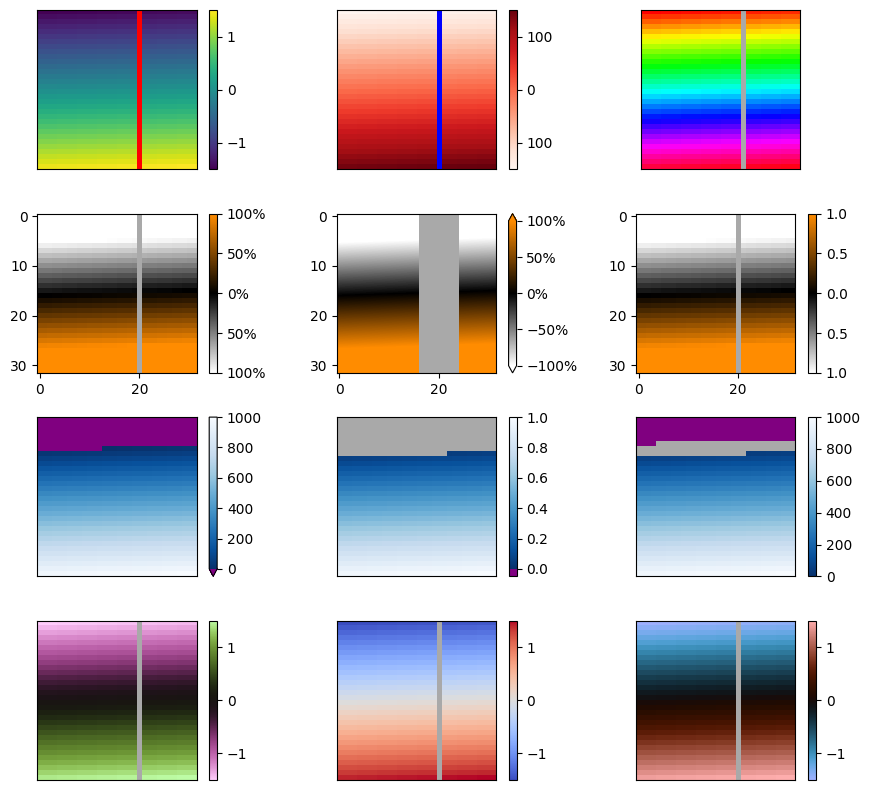

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from eitprocessing.datahandling.pixelmap import DifferenceMap, ODCLMap, PixelMap, TIVMap


def value_gradient(start: float, end: float, n: int = 32):
    """Create a gradient of values from start to end in an n x n grid."""
    return np.reshape(np.linspace(start, end, n * n), (n, n))


fig, axes = plt.subplots(4, 3, figsize=(9, 8))
values = value_gradient(-1.5, 1.5)
values[:, 20] = np.nan

## PixelMap example


# Plot with NaN values and custom facecolor
PixelMap(values, facecolor="red").imshow(ax=axes[0, 0])

# Plot with NaN values, facecolor set in imshow, and custom cmap
PixelMap(values * 100, cmap="Reds", facecolor="red").imshow(ax=axes[0, 1], absolute=True, facecolor="blue")

# Plot with NaN values, cmap set in imshow
PixelMap(values).imshow(ax=axes[0, 2], colorbar=False, cmap="hsv")

## ODCLMap example
odcl_map = ODCLMap(values)

# ODCL plot with hidding axes
odcl_map.imshow(hide_axes=False, ax=axes[1, 0])

# ODCL plot overriding absolute, and with extra kwargs for imshow and colorbar
odcl_map.imshow(
    hide_axes=False, ax=axes[1, 1], interpolation="blackman", colorbar_kwargs={"extend": "both"}, absolute=False
)

# ODCL plot overriding percentage
odcl_map.imshow(hide_axes=False, ax=axes[1, 2], percentage=False)


## TIVMap example
tiv = value_gradient(-250, 1000)
tiv_map = TIVMap(tiv)


# Plot on current axes
plt.sca(axes[2, 0])
tiv_map.imshow()

# Thresholded and normalized plot
plt.sca(axes[2, 1])
tiv_map.threshold(50).imshow(normalize=True, colorbar_kwargs={"extendrect": True})

# Don't extend colorbar, threshold absolute values
plt.sca(axes[2, 2])
tiv_map.threshold(50, absolute=True).imshow(colorbar_kwargs={"extend": None})

# Plot difference maps
diff_map = DifferenceMap(values)

diff_map.imshow(ax=axes[3, 0])
diff_map.imshow(ax=axes[3, 1], cmap="coolwarm")
diff_map.imshow(ax=axes[3, 2], cmap="berlin")

fig.tight_layout()
